In [1]:
#Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import linear_model

In [3]:
# Reading data from remote link
df=pd.read_csv('dataset.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

In [8]:
#Exploring the dataset

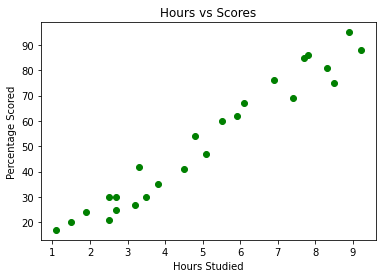

In [9]:
plt.scatter(df['Hours'],df['Scores'],color = 'Green' ,marker = 'o')
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Plotting the regression line')

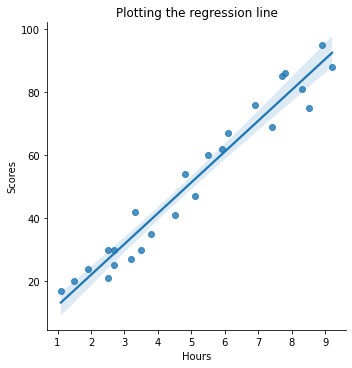

In [11]:
#Plotting the regression graph
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")

In [12]:
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
#Splitting the dataset into training set and testing set 

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [17]:
#Training Simple Linear Regression Model on training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
#Predicting test set results

In [20]:
y_pred=regressor.predict(X_test)
y_pred

array([62.53264384, 77.61520233, 28.59688724, 53.10604478, 35.19550658,
       74.78722261, 30.48220705, 28.59688724])

In [21]:
#Comparing actual and preficted data
df1=pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,67,62.532644
1,85,77.615202
2,21,28.596887
3,47,53.106045
4,27,35.195507
5,69,74.787223
6,25,30.482207
7,30,28.596887


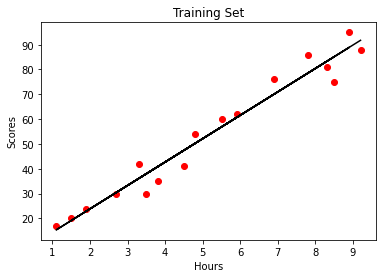

In [22]:
#Visualising the Training set results
plt.scatter(X_train,y_train,color='Red')
plt.plot(X_train,regressor.predict(X_train),color='Black')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

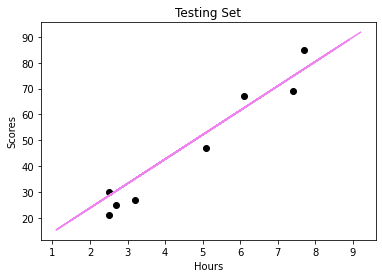

In [23]:
#Visualising the Training set results
plt.scatter(X_test,y_test,color='Black')
plt.plot(X_train,regressor.predict(X_train),color='Violet')
plt.title('Testing Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [24]:
#What will be predicted score if a student studies  for 9.25hrs per day?

In [25]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))


No of Hours = [[9.25]]
Predicted Score = 92.22643086655287


In [26]:
#Checking accuracy of our model
print("Train:" , regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train: 95.81788521854598
Test :  92.76043054786099


In [27]:
#Finding mean absolute error,r^2 score error and mean squared error

In [28]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(X_test))) 
print('r^2 score error:',r2_score(y_test, regressor.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(X_test)))

Mean absolute error: 5.80289185661211
r^2 score error: 0.92760430547861
Mean squared error:  37.771322433808365
